Text(0.5, 1.0, 'Screw Plot or Elbow Curve for Determining appropriate Clusters')

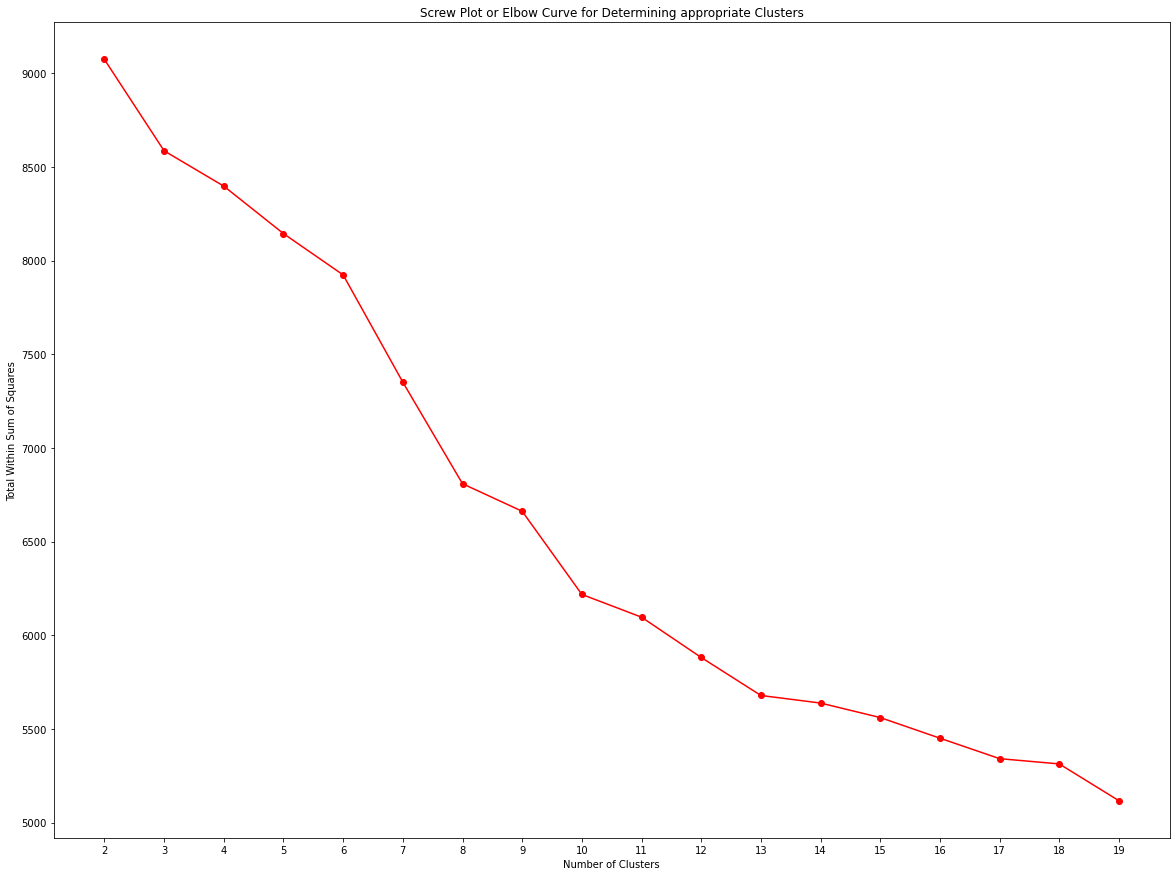

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
from sklearn.cluster import AgglomerativeClustering 

initial_airlines_df = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Clustering\\EastWestAirlines.csv",header=0)
airlines=initial_airlines_df.drop(['ID#'],axis=1)
# Normalizing the numerical data
features_airlines_normal = pd.DataFrame(data = scale(airlines), columns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award'])

###### screw plot or elbow curve ############
kclusters = list(range(2,20))
TWSS = [] # variable for storing total within sum of squares for each kmeans

for i in kclusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(features_airlines_normal)
    WSS = [] # variable for storing within sum of squares for each cluster
    for j in range(i):
        WSS.append(sum(cdist(features_airlines_normal.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,features_airlines_normal.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

plt.figure(figsize=(20,15))
plt.plot(kclusters,TWSS, 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within Sum of Squares")
plt.xticks(kclusters)
plt.title('Screw Plot or Elbow Curve for Determining appropriate Clusters')

In [50]:
# Selecting 8 clusters from the above scree plot which is the optimum number of clusters
kmeans_model=KMeans(n_clusters=8)
kmeans_model.fit(features_airlines_normal)

# getting the labels of clusters assigned to each row
#kmeans_model.labels_

class_labels=pd.Series(kmeans_model.labels_)  # converting numpy array into pandas series object
features_airlines_normal['Clusters']=class_labels  # creating a  new column and assigning it to new column
features_airlines_normal.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,6
5,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,-0.766919,0
6,0.112270,-0.186299,0.683121,-0.098242,-0.062767,0.428076,1.395256,-0.328603,-0.362168,1.392549,-0.766919,6
7,-0.523459,-0.186299,-0.769578,-0.098242,-0.062767,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,1.303918,4
8,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1.303918,3
9,0.310220,-0.186299,0.683121,-0.098242,-0.062767,0.467168,1.707671,0.492805,0.428826,1.362038,1.303918,6


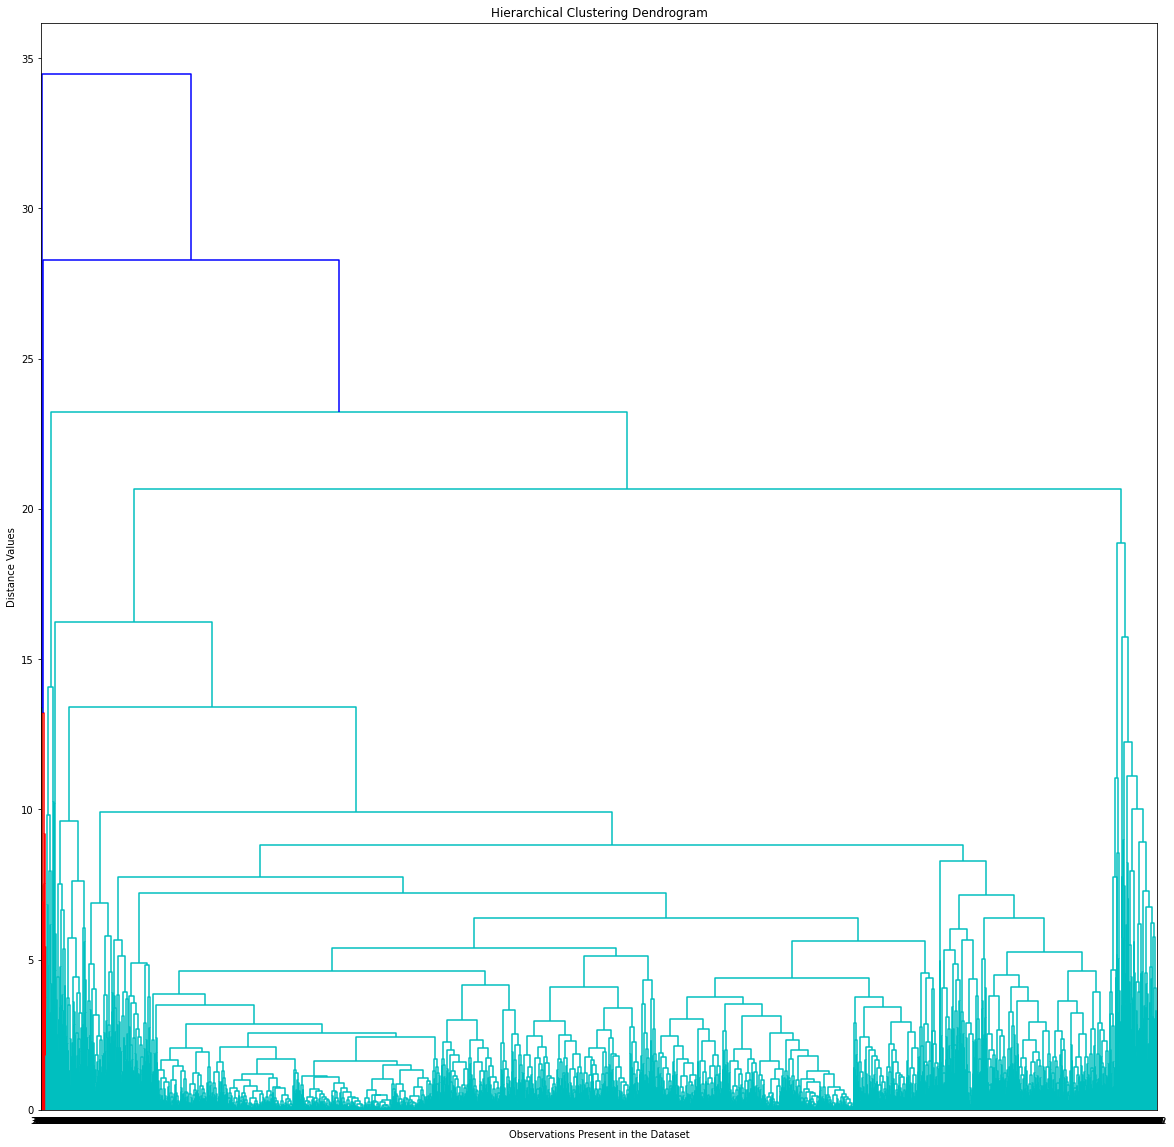

In [51]:
#features_airlines_hierarchical=features_airlines_normal.iloc[:, 0:11].values
features_airlines_hierarchical=np.array(features_airlines_normal.drop(["Clusters"],axis=1))

dist = linkage(features_airlines_hierarchical, method="complete",metric="euclidean")

plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations Present in the Dataset')
plt.ylabel('Distance Values')
sch.dendrogram(dist,leaf_rotation=0.0,leaf_font_size=8.0)
plt.show()

In [52]:
# Now applying AgglomerativeClustering choosing 6 as clusters from the dendrogram
hierarchical_complete = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity = "euclidean").fit(features_airlines_hierarchical) 

df_features_airlines_hierarchical= features_airlines_normal.drop(["Clusters"],axis=1)

df_features_airlines_hierarchical['Clusters']=pd.Series(hierarchical_complete.labels_)

# getting aggregate mean of each cluster
#df_features_airlines_hierarchical.iloc[:,0:11].groupby(df_features_airlines_hierarchical.Clusters).median()

# creating a csv file 
df_features_airlines_hierarchical.to_csv("Clustered_Airlines.csv",encoding="utf-8")